In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score

In [91]:
df=pd.read_csv('/content/drive/MyDrive/mllab/50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [102]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()




In [92]:
x=np.array(df[['R&D Spend']])
y=np.array(df[['Profit']])

In [103]:
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

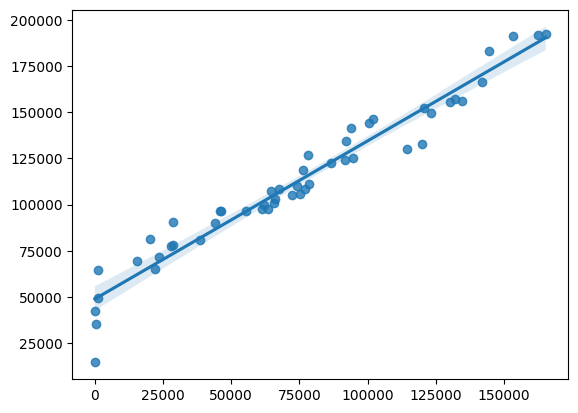

In [93]:
sns.regplot(x=x,y=y)
plt.show()


In [104]:
model = LinearRegression()
model.fit(x,y)



LinearRegression()

In [105]:
y_predicted = model.predict(x)
df['y_predicted'] = y_predicted
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit  \
0  165349.20       136897.80        471784.10    New York  192261.83   
1  162597.70       151377.59        443898.53  California  191792.06   
2  153441.51       101145.55        407934.54     Florida  191050.39   
3  144372.41       118671.85        383199.62    New York  182901.99   
4  142107.34        91391.77        366168.42     Florida  166187.94   

   y_predicted  
0     1.961768  
1     1.902857  
2     1.706821  
3     1.512650  
4     1.464154  


In [106]:
# Calculate mean squared error
mse = mean_squared_error(y, y_predicted)
print("\n")
print("THE MEAN SQUARED ERROR IS:", mse)



THE MEAN SQUARED ERROR IS: 0.05346468391956079


In [116]:
num_samples = 100
predictions = np.zeros((len(df), num_samples))


In [118]:
for i in range(num_samples):

    sample_indices = np.random.choice(len(df), size=len(df), replace=True)
    X_sample = df['R&D Spend'].iloc[sample_indices].values.reshape(-1, 1)
    y_sample = df['Profit'].iloc[sample_indices].values

    model = LinearRegression()
    model.fit(X_sample, y_sample)

    predictions[:, i] = model.predict(df['R&D Spend'].values.reshape(-1, 1))
average_prediction = np.mean(predictions, axis=1)
bias = np.mean((average_prediction - df['Profit']) ** 2)
variance = np.mean(np.var(predictions, axis=1))
print("bias",bias)
print("variance",variance)

bias 85159364.36083725
variance 4974579.683319226
